# Introduction

How much will a house in Kings County sell for? 

In this analysis, I will use data describing the physical properties and location of X homes in Kings County to show predict the price that similar houses will fetch in the real estate market.

## Methodology

### Exploring the data

To understand what we're looking at, I will first explore the data using visualizations to make explicit the relationships between the various characteristics of the homes.

### Describing the data

I will then make observations based on these visualizations and identify which factors are likely to be most predictive of house price.

### Defining the question

This analysis estimates both prediction and inference. What does that mean? I aim to _predict_ the selling price of comparable homes by creating a mathematical model informed by the data. I also aim to _infer_ the "why" behind that price. Thus, my model will answer questions like:

+ Which factors predict the outcome, and how? (e.g., are they positively or negatively correlated with price)
+ Which factors have the greatest impact on price? 
+ Is a particular house over- or under-valued relative to its peers?

### Preparing the data for analysis

I will clean and reformat the data to optimize it for creating a highly predictive and informative model.

### Fitting a model to the data

I use linear regression for this analysis for two reasons. First, it has high predictive value; it can be used to make assumptions about new homes, not just those in the dataset. Second, it is highly interpretable. It is not a "black box" algorithm; rather, a human being can inspect the reasons why I chose the factors I did to create the model. It will be easy to understand the intuitions that explain why any individual factor is predictive of the outcome.

In this section, I will use several different linear regression models to find the best fit. I will also verify their accuracy using statistical methods and visualizations.

# Exploring the Data

## 1. Examining the Data
First, we'll need to import the data itself and some tools to help us analyze it. Below, I have imported several Python libraries for analyzing and visualizing data and loaded our data set. 

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import sklearn.linear_model as linear_model

import seaborn as sns
sns.set_palette('PuBu_r')
sns.set_style('darkgrid')

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_info_columns', 30)
pd.set_option('display.max_info_rows', 30)

In [2]:
df = pd.read_csv('kc_house_data.csv')


#Inspect the first 5 rows of the data to make sure it loaded correctly
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         NaN   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   
2           0.0      1933           NaN    98028  47.7379 -122.233   
3         910.0      1965           0.0    98136  47.5208 -122.393   
4           0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

Here we see some summary statistics for our dataframe.

In [87]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

At a birds'-eye view, we can see that the dataset contains 21,597 entries, each representing a home. Each home is associated with 21 factors or variables (expressed below as columns).

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## 2. Manipulating the Data

I will not be using the date or id columns for analysis, so I will drop them from the DataFrame.

In [3]:
# Clean the data: drop columns
df.drop(['id', 'date'], axis=1, inplace=True)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0         NaN   
1  538000.0         3       2.25         2570      7242     2.0         0.0   
2  180000.0         2       1.00          770     10000     1.0         0.0   
3  604000.0         4       3.00         1960      5000     1.0         0.0   
4  510000.0         3       2.00         1680      8080     1.0         0.0   

   view  condition  grade  sqft_above sqft_basement  yr_built  yr_renovated  \
0   0.0          3      7        1180           0.0      1955           0.0   
1   0.0          3      7        2170         400.0      1951        1991.0   
2   0.0          3      6         770           0.0      1933           NaN   
3   0.0          5      7        1050         910.0      1965           0.0   
4   0.0          3      8        1680           0.0      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

We can see that some data is missing for some of the categories, namely waterfront, view, and yr_renovated. Almost all of the data types are in numerical format, but not all of them make sense. For example, sqft_basement is not expressed numerically, whereas some variables (like waterfront) are numerical, even though they may not be continuous values. We'll have to inspect these variables to see whether this indicates missing or corrupt data.

In [90]:
print(df.isna().any())

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [19]:
len(df[df.sqft_basement != '0.0'])

8771

In [20]:
len(df.sqft_basement)

21597

In [21]:
len(df[df.sqft_basement == '?'])

454

The sqft_basement variable is stored as an object, but should be numerical. Missing values have been indicated with "?", a string. Let's replace these with the mean value of the column in proportion to the percentage of houses with basements in the data set. We'll replace roughly 41% of the missing vlues with the mean, since that is the proportion of homes with basements in the data set.)

In [24]:
question_marks = df[df['sqft_basement'] == '?']

In [32]:
# remove the question marks so we can get the median
numerical_basement = df['sqft_basement'][df['sqft_basement'] != '?']

# coerce the strings to floats so we can operate on them
numerical_basement = numerical_basement.astype('float')

mean_sqft_basement = numerical_basement.mean()
mean_sqft_basement

291.851723974838

In [4]:
#calculate relative probability of basement based on observed data
rel_prob = [0.41, 0.59]
prob = [i/sum(rel_prob) for i in rel_prob]

def impute_basement():
        return np.random.choice([291.85, 0.0], p=prob)

In [4]:
df['sqft_basement'].replace({'?': np.float(0.0)}, inplace=True)

In [5]:
df.sqft_basement = df.sqft_basement.astype(float)

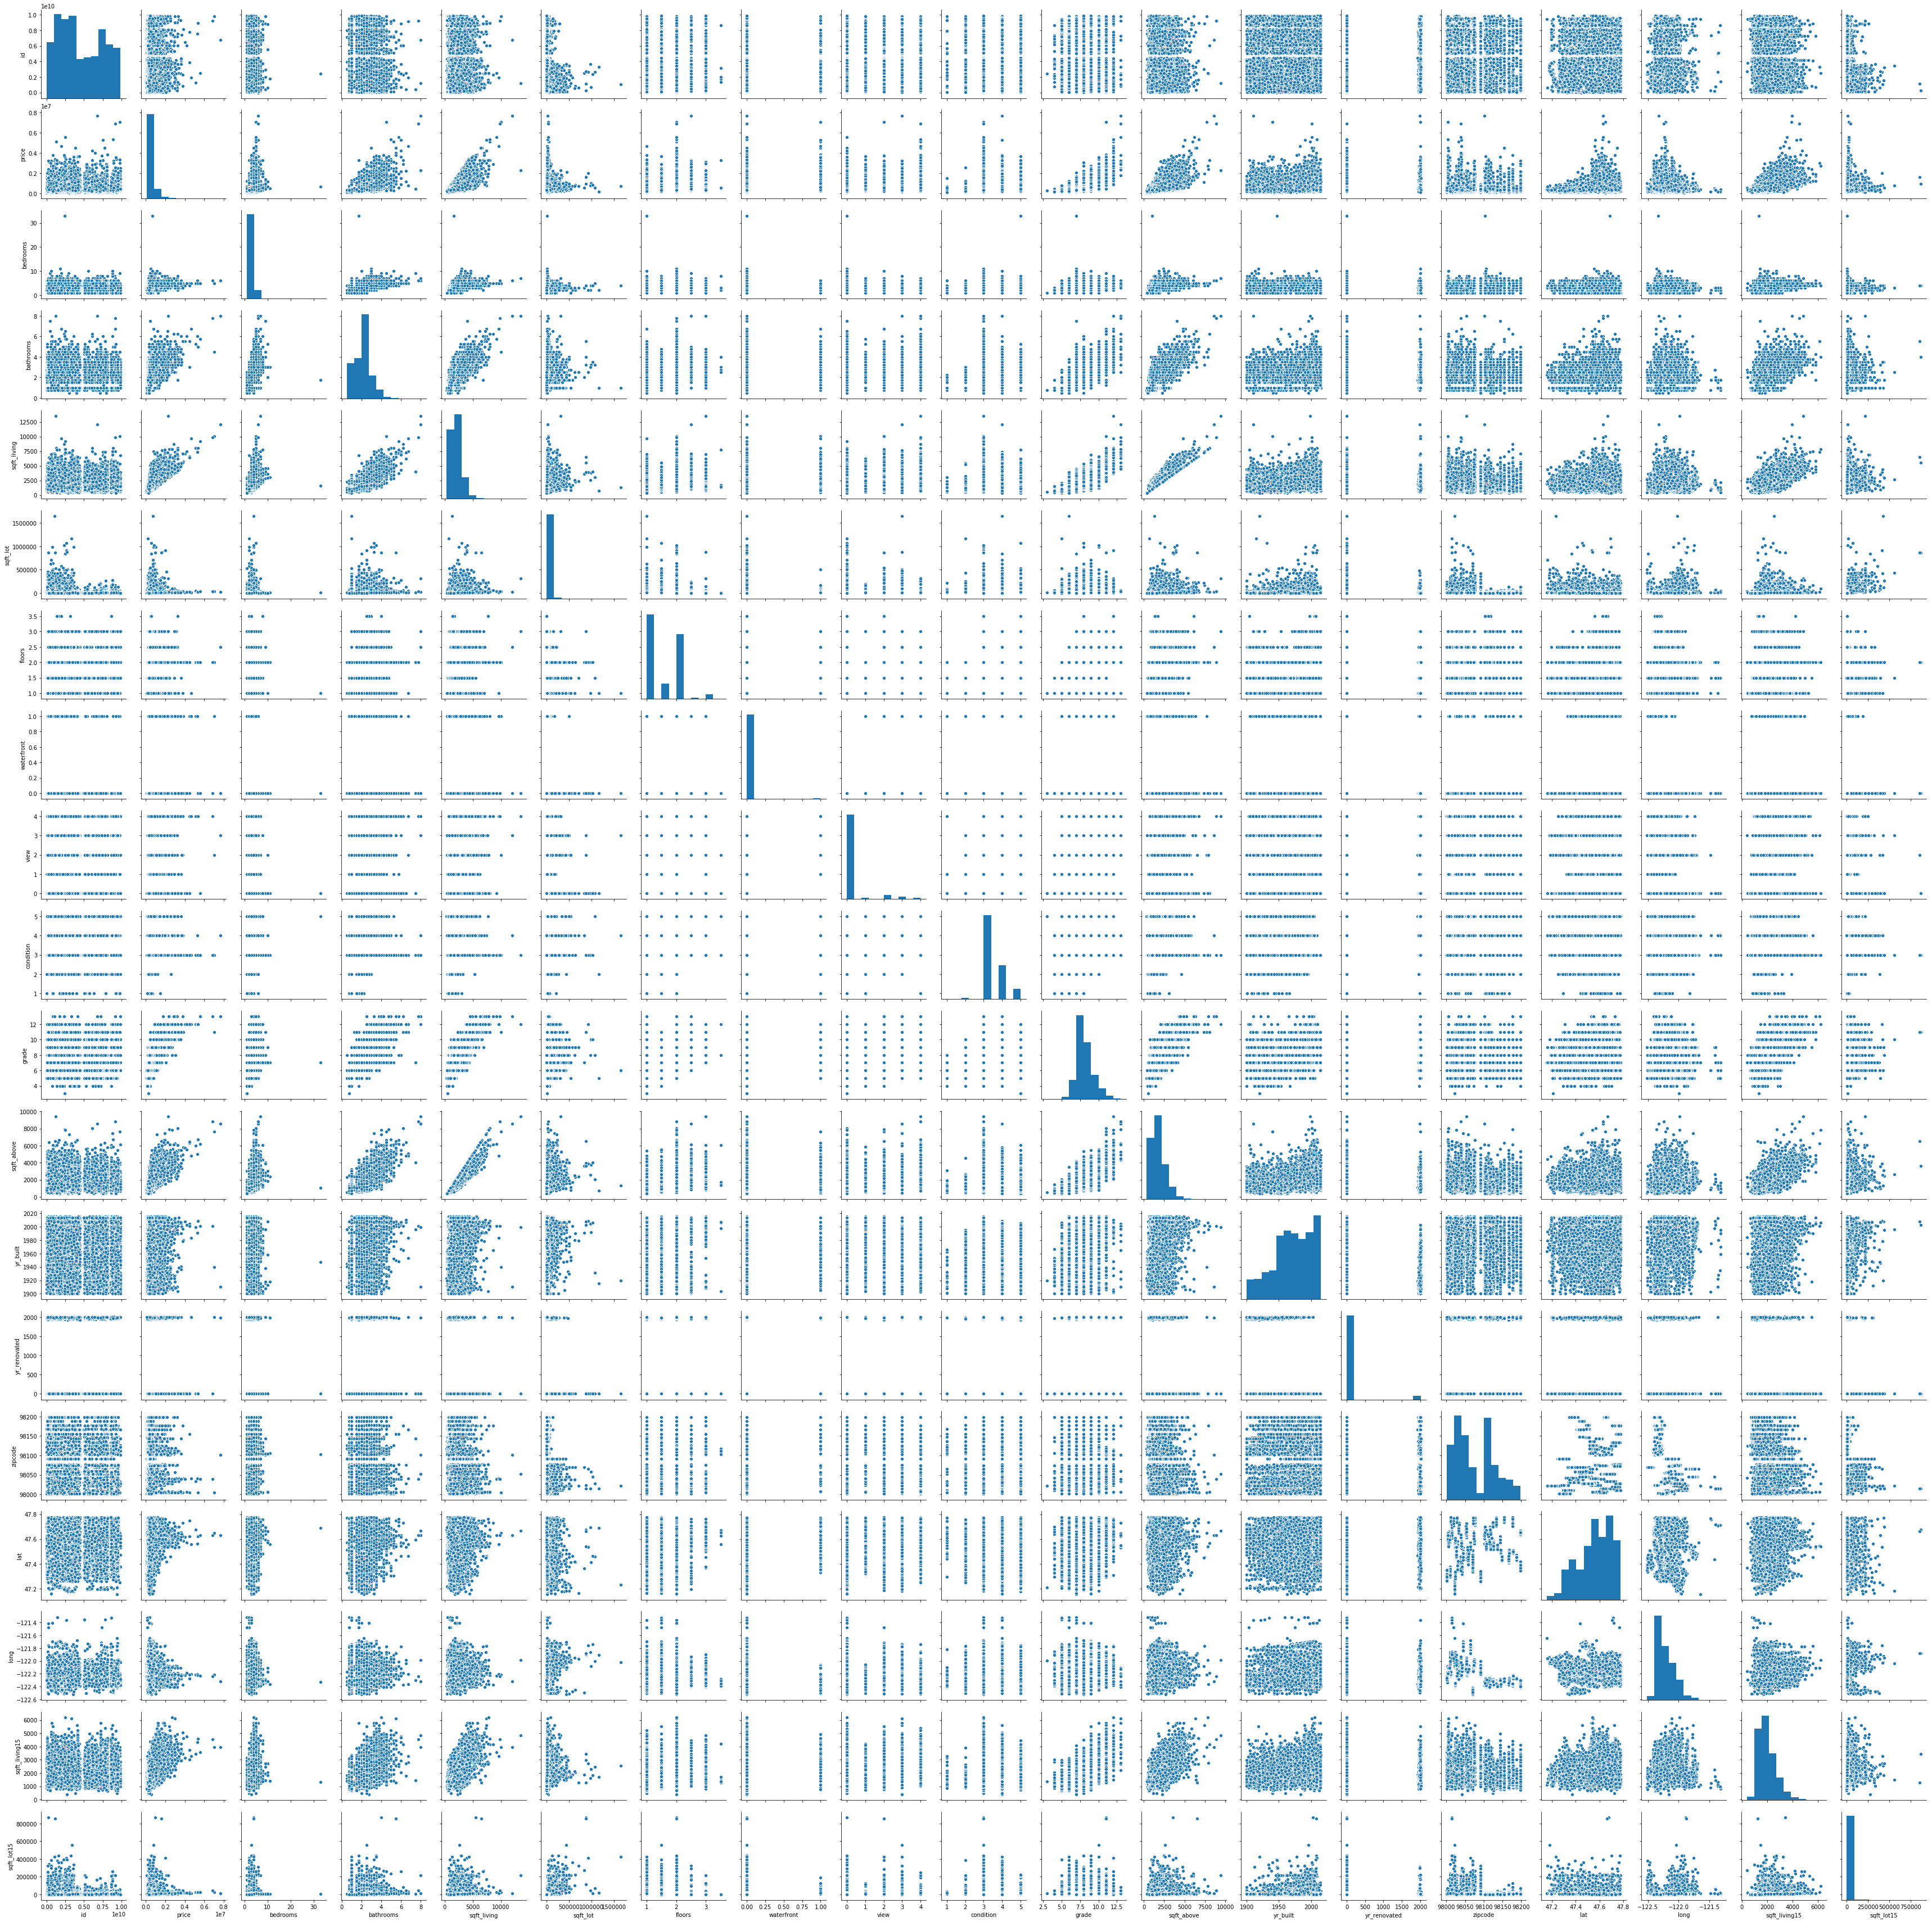

In [20]:
sns.pairplot(data=df);

Let's deal with more missing values. Looking at the data, we see that three columns contain missing values: waterfront, view, and yr_renovated.

In [9]:
# Clean the data: check for nulls and fix them
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The column yr_renovated has a lot of missing values and does not appear to be linearly correlated with price, per the scatterplot above. Therefore, I decided not to use it in the analysis.

In [6]:
#Drop column with nulls
df.drop('yr_renovated', axis=1, inplace=True)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0         NaN   
1  538000.0         3       2.25         2570      7242     2.0         0.0   
2  180000.0         2       1.00          770     10000     1.0         0.0   
3  604000.0         4       3.00         1960      5000     1.0         0.0   
4  510000.0         3       2.00         1680      8080     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
0   0.0          3      7        1180            0.0      1955    98178   
1   0.0          3      7        2170          400.0      1951    98125   
2   0.0          3      6         770            0.0      1933    98028   
3   0.0          5      7        1050          910.0      1965    98136   
4   0.0          3      8        1680            0.0      1987    98074   

       lat     long  sqft_living15  sqft_lot15  
0  47.5112 -122.257           1340        5650  
1  47.7210 -122.319           1690        7639  
2  47.7379 -122.233           2720        8062  
3  47.5208 -122.393           1360        5000  
4  47.6168 -122.045           1800        7503

Since there are so few recorded values for the view feature, we can afford to drop this column from the analysis.

In [7]:
#Drop view
df.drop('view', axis=1, inplace=True)
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

To make the waterfront data usable, we have to do something about the missing data. There are 2376 observations missing data, which is a lot to simply delete from the dataset. Since 99% of the homes in the dataset are not on the waterfront, I chose to overwrite the null values with 0 instead.

In [16]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [8]:
df['waterfront'].fillna(value=0, inplace=True)

We have now dealt with the null values in our data.

In [9]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Splitting, Selecting, and Scaling data

In [9]:
features = df.iloc[:,1:]
target = df.iloc[:,:1]

### 1. Checking for Collinearity

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
price            float64
bedrooms         int64
bathrooms        float64
sqft_living      int64
sqft_lot         int64
floors           float64
waterfront       float64
condition        int64
grade            int64
sqft_above       int64
sqft_basement    float64
yr_built         int64
zipcode          int64
lat              float64
long             float64
sqft_living15    int64
sqft_lot15       int64
dtypes: float64(7), int64(10)
memory usage: 2.8 MB


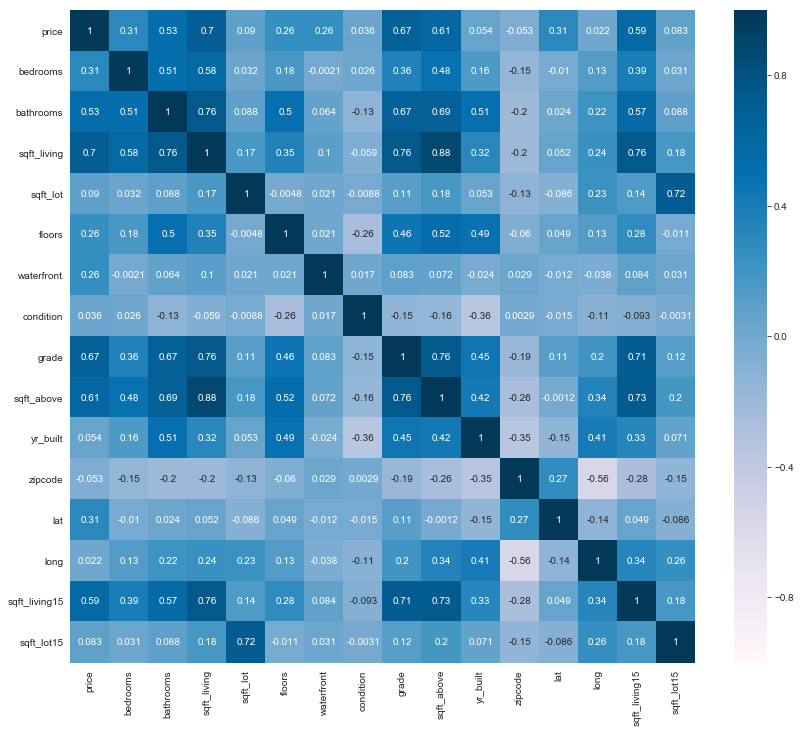

In [18]:
# heat map
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="PuBu")

Now that we've dealt with the null values, we must determine which variables have the highest predictive value and are worth including in our regression analysis. To do so, we must examine them against each other to check for collinearity, since we want to eliminate redundant features.

From the above correlation coefficient matrix, we can see that:

+ grade is highly correlated with sqft_living (0.76) and bathrooms (0.67)
+ sqft_above is highly correlated with bathrooms (0.69) and sqft_living (0.88)
+ sqft_living15 is highly correlated with sqft_living (0.76), grade (0.71), and sqft_above (0.73)

We can look at the most predictive features to decide which of the collinear features to drop.

In [10]:
# Look at which features are highly correlated with each other
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Store features to drop if their correlation coefficient is greater than 0.75
to_drop = [col for col in upper.columns if any(upper[col] > 0.75)]

print(to_drop)

['sqft_living', 'grade', 'sqft_above', 'sqft_living15']


In [11]:
# Rank the features by most predictive
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, mutual_info_regression

def feature_selector(X, y, scoring, k):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

In [12]:
target_flat = np.ravel(target.values)

In [13]:
# Rank the features and select the top ten most predictive
features_to_use = feature_selector(features, target_flat, mutual_info_regression, k=10)
features_to_use

bedrooms  bathrooms  sqft_living  grade  sqft_above  zipcode      lat  \
0             3       1.00         1180      7        1180    98178  47.5112   
1             3       2.25         2570      7        2170    98125  47.7210   
2             2       1.00          770      6         770    98028  47.7379   
3             4       3.00         1960      7        1050    98136  47.5208   
4             3       2.00         1680      8        1680    98074  47.6168   
5             4       4.50         5420     11        3890    98053  47.6561   
6             3       2.25         1715      7        1715    98003  47.3097   
7             3       1.50         1060      7        1060    98198  47.4095   
8             3       1.00         1780      7        1050    98146  47.5123   
9             3       2.50         1890      7        1890    98038  47.3684   
10            3       2.50         3560      8        1860    98007  47.6007   
11            2       1.00         1160      7         860    98115  47.6900   
12            3       1.00         1430      7        1430    98028  47.7558   
13            3       1.75         1370      7        1370    98074  47.6127   
14            5       2.00         1810      7        1810    98107  47.6700   
...         ...        ...          ...    ...         ...      ...      ...   
21582         4       2.50         3118      9        3118    98001  47.2931   
21583         4       3.00         3990      9        3990    98053  47.6857   
21584         5       3.75         4470     11        4470    98004  47.6321   
21585         3       2.50         1425      8        1425    98125  47.6963   
21586         3       1.75         1500      6        1500    98010  47.3095   
21587         3       2.50         2270      8        2270    98065  47.5389   
21588         3       2.00         1490      8        1490    98144  47.5699   
21589         4       2.50         2520      9        2520    98056  47.5137   
21590         4       3.50         3510      9        2600    98136  47.5537   
21591         3       2.50         1310      8        1180    98116  47.5773   
21592         3       2.50         1530      8        1530    98103  47.6993   
21593         4       2.50         2310      8        2310    98146  47.5107   
21594         2       0.75         1020      7        1020    98144  47.5944   
21595         3       2.50         1600      8        1600    98027  47.5345   
21596         2       0.75         1020      7        1020    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
5     -122.005           4760      101930  
6     -122.327           2238        6819  
7     -122.315           1650        9711  
8     -122.337           1780        8113  
9     -122.031           2390        7570  
10    -122.145           2210        8925  
11    -122.292           1330        6000  
12    -122.229           1780       12697  
13    -122.045           1370       10208  
14    -122.394           1360        4850  
...        ...            ...         ...  
21582 -122.264           2673        6500  
21583 -122.046           3370        6814  
21584 -122.200           2780        8964  
21585 -122.318           1285        1253  
21586 -122.002           1320       11303  
21587 -121.881           2270        5731  
21588 -122.288           1400        1230  
21589 -122.167           2520        6023  
21590 -122.398           2050        6200  
21591 -122.409           1330        1265  
21592 -122.346           1530        1509  
21593 -122.362           1830        7200  
21594 -122.299           1020        2007  
21595 -122.069           1410        1287  
21596 -122.299           1020        1357  

[21597 rows x 10 columns]

The heatmap above and scatterplots below show that sqft_living, grade, sqft_above, and sqft_living15 are highly correlated with one another. Our feature ranking indicates that sqft_living is the most predictive of these, so we will drop the rest of them to eliminate collinearity problems.

In [14]:
df.drop(['grade', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)

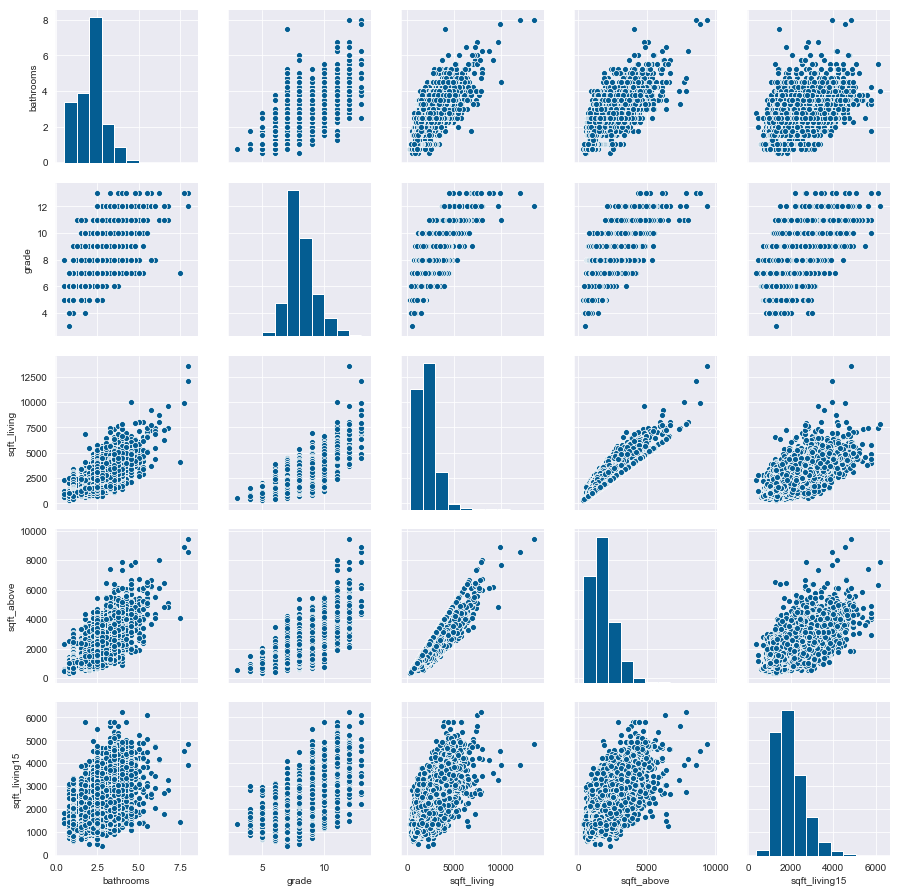

In [8]:
sns.pairplot(df, vars=['bathrooms', 'grade', 'sqft_living', 'sqft_above', 'sqft_living15']);

## 2. Converting Categorical Variables 

To use the categorical variables in linear regression, we need to convert them into a usable format using discretization (binning) and dummy variables.

In [15]:
# Create dummy variables
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer


waterfront_dummies = pd.get_dummies(df['waterfront'], prefix='wf', drop_first=True)
condition_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)

# Bin continuous values

disc = KBinsDiscretizer(encode='onehot-dense')

disc_geo = KBinsDiscretizer(encode='onehot-dense', strategy='kmeans', n_bins=10)

bedrooms_bin = disc.fit_transform(df[['bedrooms']])
bathrooms_bin = disc.fit_transform(df[['bathrooms']])
floors_bin = disc.fit_transform(df[['floors']])
zipcode_bin = disc_geo.fit_transform(df[['zipcode']]) 
lat_bin = disc_geo.fit_transform(df[['lat']])

In [16]:
df.drop(['waterfront', 'condition', 'bedrooms', 'bathrooms', 'floors', 'yr_built', 
         'zipcode', 'lat', 'long'], axis=1, inplace=True)

In [17]:
# Add dummy variables
pd.concat([df, waterfront_dummies, condition_dummies], axis=1)

price  sqft_living  sqft_lot  sqft_basement  sqft_lot15  wf_1.0  \
0       221900.0         1180      5650            0.0        5650       0   
1       538000.0         2570      7242          400.0        7639       0   
2       180000.0          770     10000            0.0        8062       0   
3       604000.0         1960      5000          910.0        5000       0   
4       510000.0         1680      8080            0.0        7503       0   
5      1230000.0         5420    101930         1530.0      101930       0   
6       257500.0         1715      6819            0.0        6819       0   
7       291850.0         1060      9711            0.0        9711       0   
8       229500.0         1780      7470          730.0        8113       0   
9       323000.0         1890      6560            0.0        7570       0   
10      662500.0         3560      9796         1700.0        8925       0   
11      468000.0         1160      6000          300.0        6000       0   
12      310000.0         1430     19901            0.0       12697       0   
13      400000.0         1370      9680            0.0       10208       0   
14      530000.0         1810      4850            0.0        4850       0   
...          ...          ...       ...            ...         ...     ...   
21582   541800.0         3118      7866            0.0        6500       0   
21583   810000.0         3990      7838            0.0        6814       0   
21584  1540000.0         4470      8088            0.0        8964       0   
21585   467000.0         1425      1179            0.0        1253       0   
21586   224000.0         1500     11968            0.0       11303       0   
21587   507250.0         2270      5536            0.0        5731       0   
21588   429000.0         1490      1126            0.0        1230       0   
21589   610685.0         2520      6023            0.0        6023       0   
21590  1010000.0         3510      7200          910.0        6200       0   
21591   475000.0         1310      1294          130.0        1265       0   
21592   360000.0         1530      1131            0.0        1509       0   
21593   400000.0         2310      5813            0.0        7200       0   
21594   402101.0         1020      1350            0.0        2007       0   
21595   400000.0         1600      2388            0.0        1287       0   
21596   325000.0         1020      1076            0.0        1357       0   

       cond_2  cond_3  cond_4  cond_5  
0           0       1       0       0  
1           0       1       0       0  
2           0       1       0       0  
3           0       0       0       1  
4           0       1       0       0  
5           0       1       0       0  
6           0       1       0       0  
7           0       1       0       0  
8           0       1       0       0  
9           0       1       0       0  
10          0       1       0       0  
11          0       0       1       0  
12          0       0       1       0  
13          0       0       1       0  
14          0       1       0       0  
...       ...     ...     ...     ...  
21582       0       1       0       0  
21583       0       1       0       0  
21584       0       1       0       0  
21585       0       1       0       0  
21586       0       1       0       0  
21587       0       1       0       0  
21588       0       1       0       0  
21589       0       1       0       0  
21590       0       1       0       0  
21591       0       1       0       0  
21592       0       1       0       0  
21593       0       1       0       0  
21594       0       1       0       0  
21595       0       1       0       0  
21596       0       1       0       0  

[21597 rows x 10 columns]

In [18]:
# Add bins
df = pd.concat([df, pd.DataFrame(bedrooms_bin).add_prefix('bed'), pd.DataFrame(bathrooms_bin).add_prefix('bath'),
        pd.DataFrame(floors_bin).add_prefix('floors'), pd.DataFrame(zipcode_bin).add_prefix('zip'),
               pd.DataFrame(lat_bin).add_prefix('lat')], axis=1)


# Drop yr_built and long

In [19]:
# Drop redundant bins (k-1)
df.drop(['bed0', 'bath0', 'floors0', 'zip0'], axis=1, inplace=True)

In [28]:
df.head()

price  sqft_living  sqft_lot sqft_basement  sqft_lot15  bed1  bed2  \
0  221900.0         1180      5650           0.0        5650   0.0   1.0   
1  538000.0         2570      7242         400.0        7639   0.0   1.0   
2  180000.0          770     10000           0.0        8062   0.0   0.0   
3  604000.0         1960      5000         910.0        5000   0.0   0.0   
4  510000.0         1680      8080           0.0        7503   0.0   1.0   

   bed3  bed4  bath1  bath2  bath3  bath4  floors1  floors2  ...   zip5  zip6  \
0   0.0   0.0    0.0    0.0    0.0    0.0      0.0      1.0  ...    0.0   0.0   
1   0.0   0.0    0.0    1.0    0.0    0.0      0.0      0.0  ...    0.0   1.0   
2   0.0   0.0    0.0    0.0    0.0    0.0      0.0      1.0  ...    0.0   0.0   
3   0.0   1.0    0.0    0.0    0.0    1.0      0.0      1.0  ...    0.0   1.0   
4   0.0   0.0    0.0    1.0    0.0    0.0      0.0      1.0  ...    0.0   0.0   

   zip7  zip8  zip9  lat0  lat1  lat2  lat3  lat4  lat5  lat6  lat7  lat8  \
0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   

   lat9  
0   0.0  
1   1.0  
2   1.0  
3   0.0  
4   0.0  

[5 rows x 36 columns]

## 3. Normalize and Scale Continuous Variables

Next, we will normalize and scale the continuous factors.

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# First, split the data into training and testing

features = df.iloc[:,1:]
target = df.iloc[:,:1]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=0.2)

In [46]:
# create scalers
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, StandardScaler

#scale_robust = RobustScaler(copy=False, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)
#scale_std = StandardScaler(copy=False)

In [47]:
#X_train_std = scale_std.fit_transform(X_train)
#scale_std.transform(X_test)

In [48]:
# Scale variables

scaled_sqft_living = None


# 4. Run Linear Regression

In [20]:
#import statsmodels.
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

reg = LinearRegression()

features = df.iloc[:,1:]
target = df.iloc[:,:1]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=0.2)

reg_model = reg.fit(X_train, y_train)
X_int = sm.add_constant(features)
                   
model = sm.OLS(target,X_int).fit()
#f = 'price~sqft_living' 
#model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1617.
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        19:15:25   Log-Likelihood:            -2.9518e+05
No. Observations:               21597   AIC:                         5.904e+05
Df Residuals:                   21568   BIC:                         5.906e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.85e+04   4766.169     -5.980      0.000   -3.78e+04   -1.92e+04
sqft_living     332.6123      2.667    124.714      0.000     327.385     337.840
sqft_lot          0.1892      0.050      3.806      0.000       0.092       0.287
sqft_basement   -64.8080      4.409    -14.698      0.000     -73.451     -56.166
sqft_lot15       -0.3367      0.076     -4.422      0.000      -0.486      -0.187
bed1          -7.818e-12    5.5e-12     -1.420      0.156   -1.86e-11    2.97e-12
bed2          -3.934e+04   4837.464     -8.132      0.000   -4.88e+04   -2.99e+04
bed3          -3.088e-11   3.92e-12     -7.871      0.000   -3.86e-11   -2.32e-11
bed4          -1.039e+05   5578.046    -18.620      0.000   -1.15e+05   -9.29e+04
bath1         -4.244e+04   4954.075     -8.567      0.000   -5.22e+04   -3.27e+04
bath2         -5.231e+04   5433.582     -9.628      0.000    -6.3e+04   -4.17e+04
bath3          1.495e-10   5.15e-12     29.013      0.000    1.39e-10     1.6e-10
bath4         -6.683e+04   6005.535    -11.128      0.000   -7.86e+04   -5.51e+04
floors1       -4.474e-11   2.81e-12    -15.924      0.000   -5.02e-11   -3.92e-11
floors2        5762.9875   2486.129      2.318      0.020     889.991    1.06e+04
floors3       -9.021e-11   4.11e-12    -21.953      0.000   -9.83e-11   -8.22e-11
floors4       -3.426e+04   3790.395     -9.040      0.000   -4.17e+04   -2.68e+04
zip1            435.6535   5410.738      0.081      0.936   -1.02e+04     1.1e+04
zip2          -8.006e+04   6323.977    -12.660      0.000   -9.25e+04   -6.77e+04
zip3          -1.396e+05   6842.233    -20.408      0.000   -1.53e+05   -1.26e+05
zip4          -3.229e+04   1.27e+04     -2.534      0.011   -5.73e+04   -7316.762
zip5           1.574e+04   6081.173      2.588      0.010    3821.215    2.77e+04
zip6          -1.181e+04   6758.422     -1.747      0.081   -2.51e+04    1439.658
zip7          -1.864e+04   8060.014     -2.313      0.021   -3.44e+04   -2845.646
zip8          -2.223e+04   8922.148     -2.492      0.013   -3.97e+04   -4746.298
zip9          -3.563e+04   9262.912     -3.846      0.000   -5.38e+04   -1.75e+04
lat0          -1.589e+05   1.35e+04    -11.774      0.000   -1.85e+05   -1.32e+05
lat1          -1.865e+05   6130.875    -30.421      0.000   -1.99e+05   -1.74e+05
lat2          -1.462e+05   4684.346    -31.219      0.000   -1.55e+05   -1.37e+05
lat3          -8.472e+04   5768.999    -14.686      0.000    -9.6e+04   -7.34e+04
lat4           -6.14e+04   5582.236    -11.000      0.000   -7.23e+04   -5.05e+04
lat5           3.374e+04   4317.941      7.813      0.000    2.53e+04    4.22e+04
lat6             1.5e+05   4552.675     32.948      0.000    1.41e+05    1.59e+05
lat7           2.907e+05   4478.525     64.910      0.000    2.82e+05    2.99e+05
lat8           1.331e+05   4186.039     31.790   

In [ ]:
# Linear regression 4: Normalize features
# scikit-learn provides automatic tools to scale features, see, among others, MinMaxScaler, StandardScaler and Normalizer. Have a look at these built-in functions and some code examples here: 
# http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing!